## Loading Data and Basic Exploration

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps
import seaborn as sns
from scipy import stats
from sklearn.model_selection import StratifiedKFold, cross_val_predict, LeaveOneOut, train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from pprint import pprint


In [140]:
#ingesting datasets, white wine dataset is comma separated
os.chdir(r"C:\Users\belikovm\Desktop")
red = pd.read_csv("winequality-red.csv")
white = pd.read_csv("winequality-white.csv",sep=';')

red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [220]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


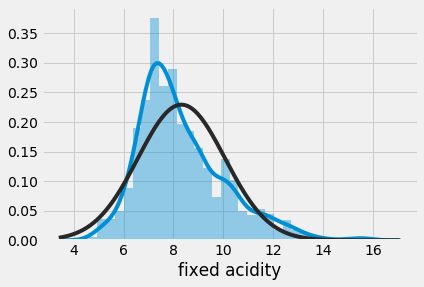

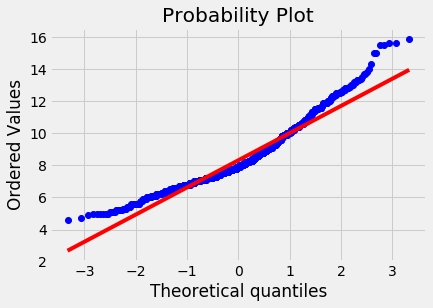

In [221]:
from scipy.stats import norm
sns.distplot(red['fixed acidity'],fit=norm);
fig = plt.figure()
res = stats.probplot(red['fixed acidity'], plot=plt)
plt.show()

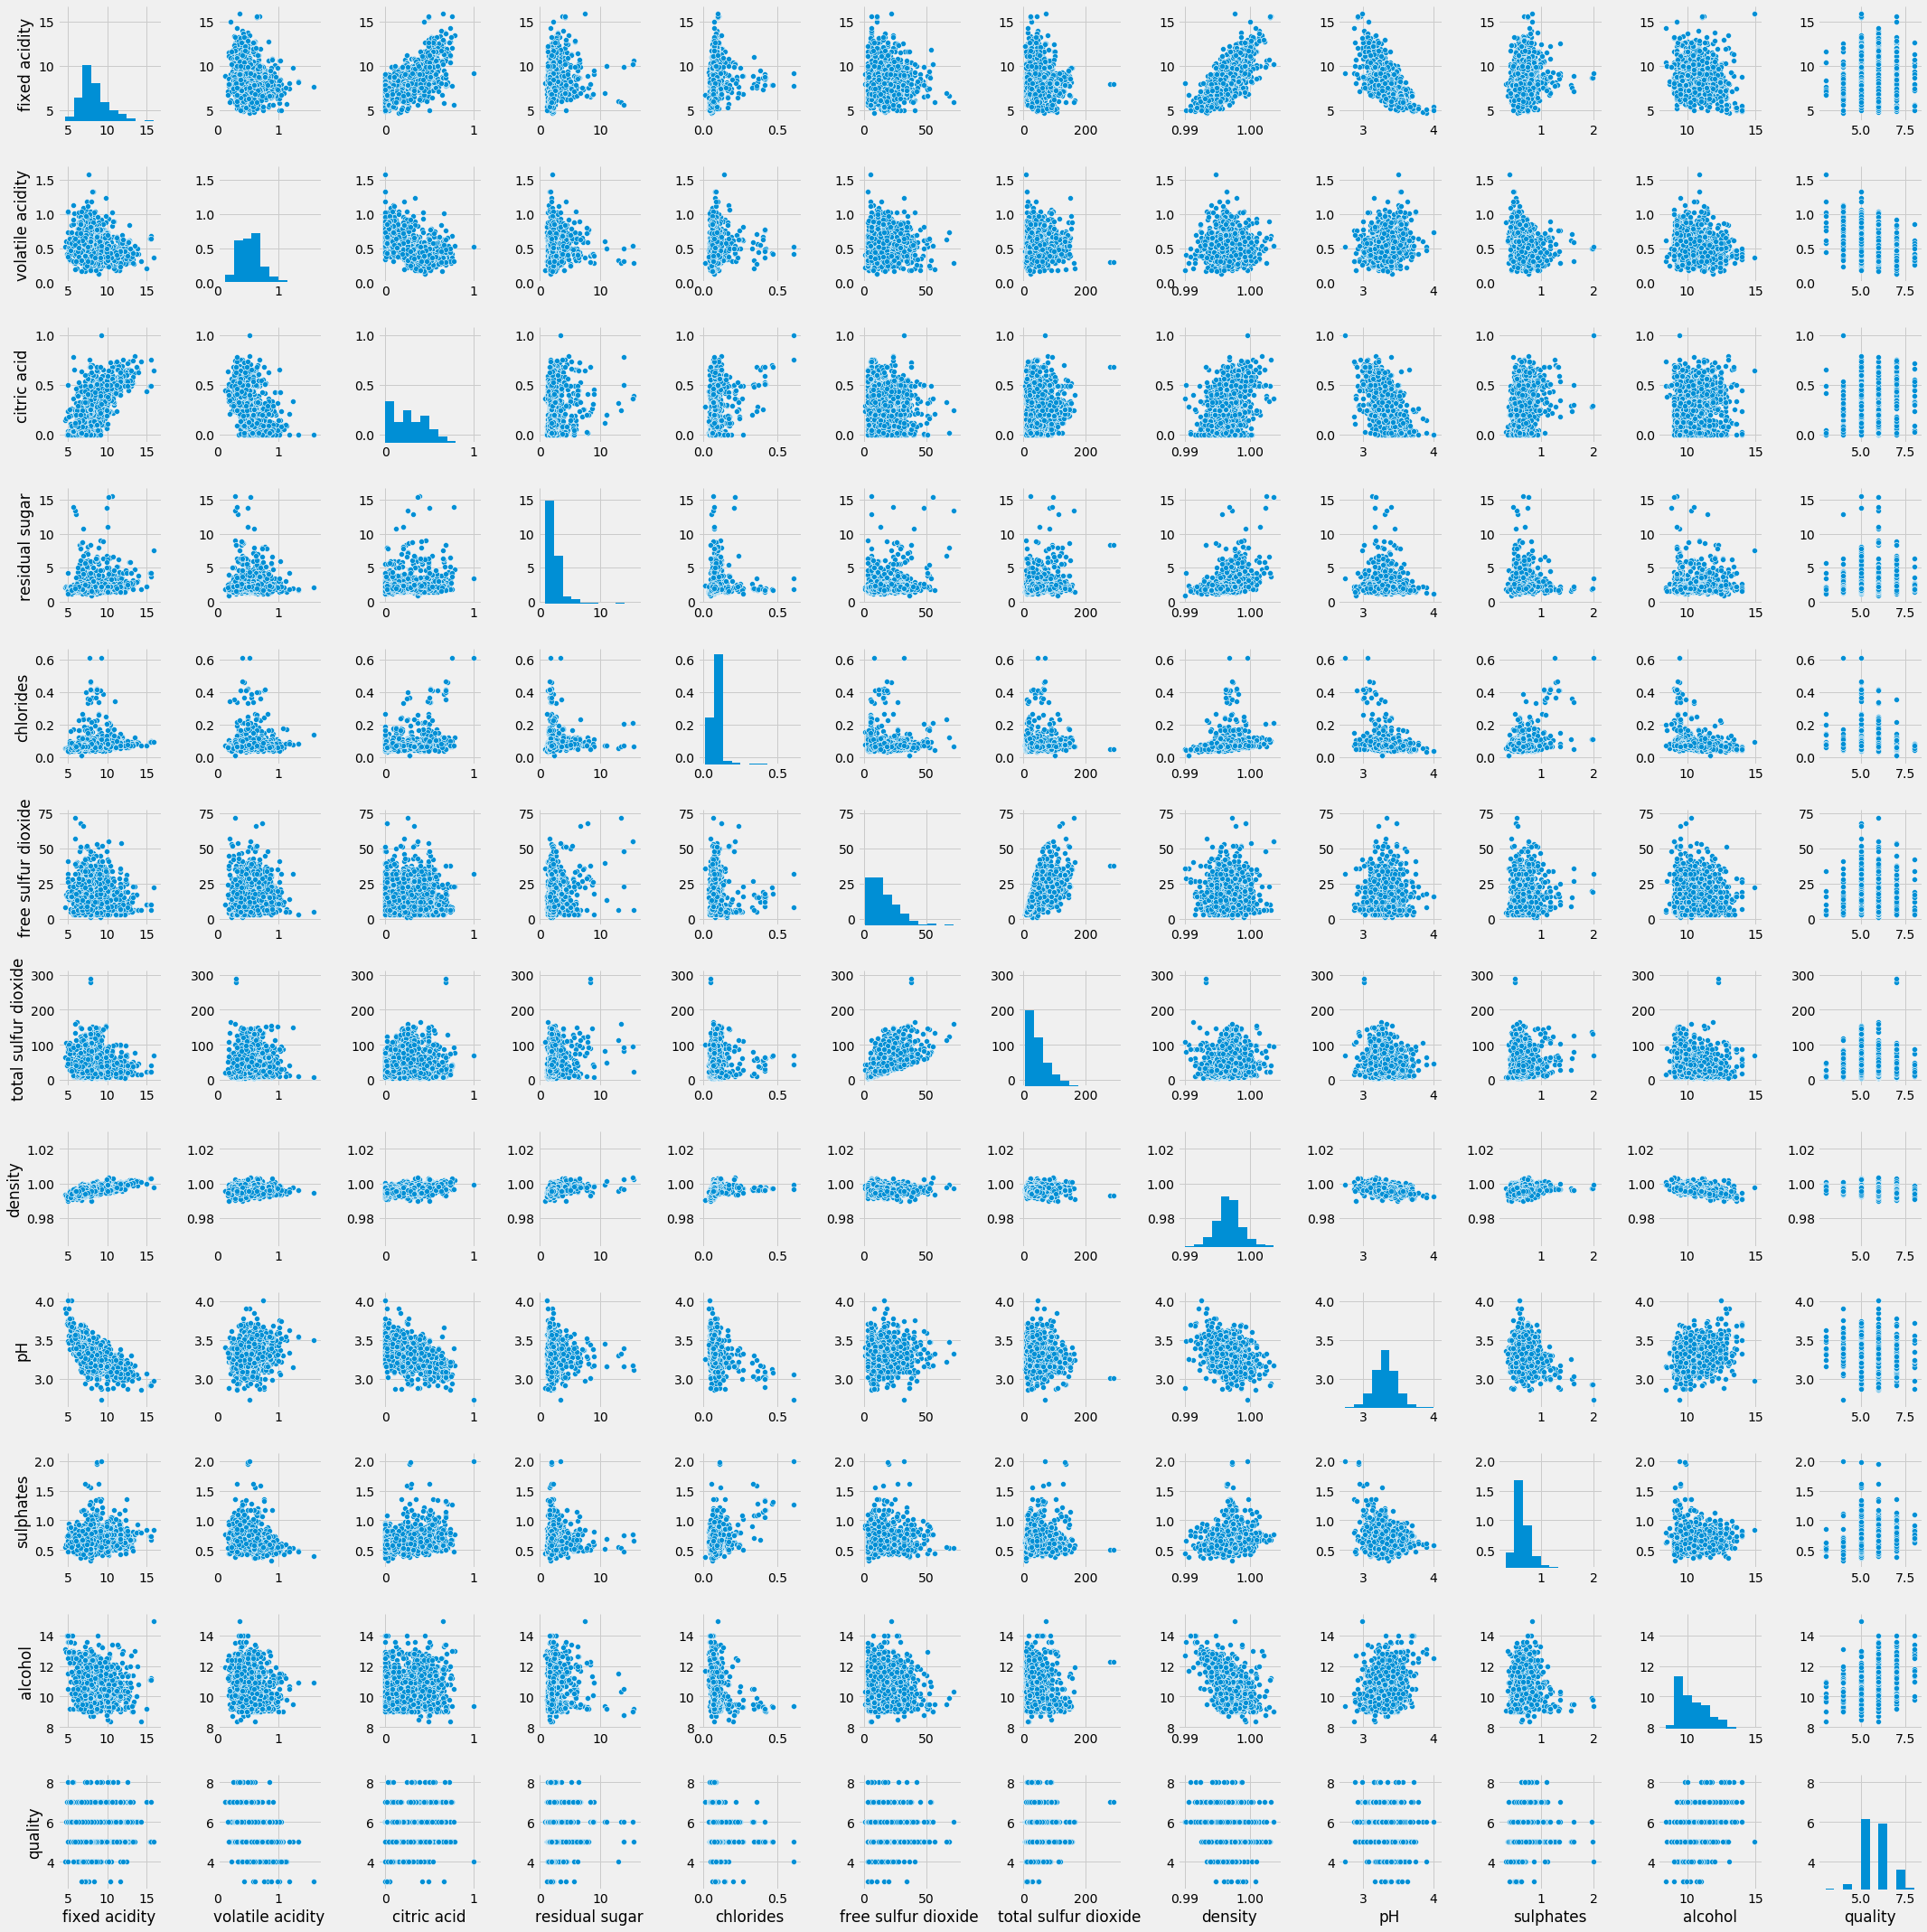

In [222]:
sns.pairplot(red)
plt.show()

# Data Preprocessing



In [141]:
# adding a conditional column for the quality class for red
conditions = [
    (red['quality'] >= 7),
    (red['quality'] <= 5)]
choices = [3,1]
red['quality class'] = np.select(conditions, choices, default=2)
print(red)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [142]:
# adding a conditional column for the quality class for white
conditions = [
    (white['quality'] >= 7),
    (white['quality'] <= 5)]
choices = [3,1]
white['quality class'] = np.select(conditions, choices, default=2)
print(white)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

# Training the Decision Tree

In [143]:
label_red = red.pop('quality class')
red.pop('quality')

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [144]:
label_white = white.pop('quality class')
white.pop('quality')

0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      5
11      5
12      5
13      7
14      5
15      7
16      6
17      8
18      6
19      5
20      8
21      7
22      8
23      5
24      6
25      6
26      6
27      6
28      6
29      7
       ..
4868    6
4869    6
4870    7
4871    6
4872    5
4873    6
4874    6
4875    6
4876    7
4877    5
4878    4
4879    6
4880    6
4881    6
4882    5
4883    6
4884    5
4885    6
4886    7
4887    7
4888    5
4889    6
4890    6
4891    6
4892    5
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [8]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, criterion='gini',min_samples_leaf=1)
decision_tree.fit(red,label_red)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.model_selection import cross_val_score
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
prediction = cross_val_predict(decision_tree, red, label_red, cv=cross_val)
print(classification_report(label_red, prediction))
rms = sqrt(mean_squared_error(label_red, prediction))
print(rms)


             precision    recall  f1-score   support

          1       0.70      0.70      0.70       744
          2       0.55      0.59      0.57       638
          3       0.52      0.41      0.46       217

avg / total       0.61      0.62      0.61      1599

0.6821222813793884


0.61537529495811982

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
#random forest with 10-fold cross validation and 200 trees for red
rfc = RandomForestClassifier(n_estimators=200, max_depth = 11)
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pred_rfc_red = cross_val_predict(rfc, red, label_red, cv=cross_val)
print(classification_report(label_red, pred_rfc_red))
from sklearn.model_selection import StratifiedKFold
rms = sqrt(mean_squared_error(label_red, pred_rfc_red))
print(rms)


             precision    recall  f1-score   support

          1       0.79      0.83      0.81       744
          2       0.68      0.69      0.69       638
          3       0.72      0.56      0.63       217

avg / total       0.74      0.74      0.74      1599

0.5421565351149563


In [156]:
confusion_matrix(label_red, pred_rfc_red, labels=[1,2,3])

array([[616, 121,   7],
       [156, 443,  39],
       [ 10,  86, 121]], dtype=int64)

In [175]:
#random forest with 10-fold cross validation and 200 trees for red, with Gridsearch parameters
rfc = RandomForestClassifier( 
    bootstrap = True,
    max_depth = 11, 
    max_features = 'sqrt',
    min_samples_leaf= 4,
    min_samples_split= 2,
    n_estimators= 1600 )
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pred_rfc_red = cross_val_predict(rfc, red, label_red, cv=cross_val)
print(classification_report(label_red, pred_rfc_red))
from sklearn.model_selection import StratifiedKFold
rms = sqrt(mean_squared_error(label_red, pred_rfc_red))
print(rms)


             precision    recall  f1-score   support

          1       0.76      0.82      0.79       744
          2       0.63      0.66      0.64       638
          3       0.69      0.42      0.53       217

avg / total       0.70      0.70      0.69      1599

0.5757231632698596


In [ ]:
#random forest with 10-fold cross validation and 200 trees for red, weighted classes
rfc = RandomForestClassifier(class_weight = "balanced", n_estimators=200)
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pred_rfc = cross_val_predict(rfc, red, label_red, cv=cross_val)
print(classification_report(label_red, pred_rfc))
from sklearn.model_selection import StratifiedKFold
rms = sqrt(mean_squared_error(label_red, pred_rfc))
print(rms)

In [176]:
#random forest with 10-fold cross validation and 200 trees for white, with Gridsearch parameters
rfc = RandomForestClassifier(
bootstrap= True,
 max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 2000
)
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pred_rfc_white = cross_val_predict(rfc, white, label_white, cv=cross_val)
print(classification_report(label_white, pred_rfc_white))
from sklearn.model_selection import StratifiedKFold
rms = sqrt(mean_squared_error(label_white, pred_rfc_white))
print(rms)


             precision    recall  f1-score   support

          1       0.75      0.69      0.72      1640
          2       0.63      0.76      0.69      2198
          3       0.73      0.53      0.61      1060

avg / total       0.69      0.68      0.68      4898

0.5865304480731974


In [22]:
#random forest with 10-fold cross validation and 200 trees for red, weighted classes
rfc = RandomForestClassifier(class_weight = "balanced", n_estimators=200)
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pred_rfc = cross_val_predict(rfc, red, label_red, cv=cross_val)
print(classification_report(label_red, pred_rfc))
from sklearn.model_selection import StratifiedKFold
rms = sqrt(mean_squared_error(label_red, pred_rfc))
print(rms)

             precision    recall  f1-score   support

          1       0.79      0.83      0.81       744
          2       0.68      0.70      0.69       638
          3       0.73      0.56      0.63       217

avg / total       0.74      0.74      0.74      1599

0.5375226335825389


In [158]:
confusion_matrix(label_white, pred_rfc_white, labels=[1,2,3])

array([[1215,  405,   20],
       [ 307, 1721,  170],
       [  22,  352,  686]], dtype=int64)

In [23]:
#random forest with 10-fold cross validation and 200 trees for white
rfc = RandomForestClassifier( n_estimators=200)
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pred_rfc = cross_val_predict(rfc, white, label_white, cv=cross_val)
print(classification_report(label_white, pred_rfc))
from sklearn.model_selection import StratifiedKFold
rms = sqrt(mean_squared_error(label_white, pred_rfc))
print(rms)

             precision    recall  f1-score   support

          1       0.78      0.75      0.77      1640
          2       0.70      0.78      0.74      2198
          3       0.78      0.65      0.71      1060

avg / total       0.74      0.74      0.74      4898

0.5353948181201478


In [12]:
#feature importances
rfc.fit(red,label_red)
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = red.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
alcohol                 0.161516
sulphates               0.128258
total sulfur dioxide    0.104014
volatile acidity        0.103806
density                 0.091857
chlorides               0.074088
citric acid             0.071229
pH                      0.069957
fixed acidity           0.069668
residual sugar          0.064554
free sulfur dioxide     0.061054


In [123]:
#feature importances
rfc.fit(white,label_white)
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = white.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
alcohol                 0.151692
density                 0.116924
volatile acidity        0.112341
free sulfur dioxide     0.093145
residual sugar          0.083476
chlorides               0.081858
total sulfur dioxide    0.080935
pH                      0.076904
citric acid             0.074977
sulphates               0.065043
fixed acidity           0.062705


In [320]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, criterion='gini',min_samples_leaf=1)
decision_tree.fit(red,label_red)
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = red.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
alcohol                 0.533719
sulphates               0.198271
volatile acidity        0.112583
total sulfur dioxide    0.083890
pH                      0.030879
free sulfur dioxide     0.029348
chlorides               0.011310
fixed acidity           0.000000
citric acid             0.000000
residual sugar          0.000000
density                 0.000000


             precision    recall  f1-score   support

          1       0.70      0.70      0.70       744
          2       0.55      0.59      0.57       638
          3       0.52      0.41      0.46       217

avg / total       0.62      0.62      0.61      1599

0.6816637117266314


             precision    recall  f1-score   support

          1       0.64      0.80      0.71       744
          2       0.52      0.42      0.47       638
          3       0.46      0.33      0.38       217

avg / total       0.57      0.58      0.57      1599

0.7121741324963109


Before OverSampling, counts of label '1': 744
Before OverSampling, counts of label '2': 638 

Before OverSampling, counts of label '3': 217 

After OverSampling, the shape of train_X: (2232, 11)
After OverSampling, the shape of train_y: (2232,) 

After OverSampling, counts of label '1': 744
After OverSampling, counts of label '2': 744
After OverSampling, counts of label '3': 744


Before OverSampling, counts of label '1': 1640
Before OverSampling, counts of label '2': 2198
Before OverSampling, counts of label '3': 1060 

After OverSampling, the shape of train_X: (6594, 11)
After OverSampling, the shape of train_y: (6594,) 

After OverSampling, counts of label '1': 2198
After OverSampling, counts of label '2': 2198
After OverSampling, counts of label '3': 2198


             precision    recall  f1-score   support

          1       0.79      0.83      0.81       744
          2       0.69      0.70      0.69       638
          3       0.74      0.60      0.66       217

avg / total       0.74      0.74      0.74      1599

0.5381040535833211


# GridSearch

In [163]:
#preparing gridsearch parameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
            
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

 'min_samples_leaf': [1, 2, 4,8,16],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 16],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [164]:
from sklearn.model_selection import RandomizedSearchCV

#GridSearch red
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(red, label_red)
rfc_random.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.3min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [165]:
#GridSearch white

rfc_white = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(white, label_white)
rfc_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.7min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [139]:
rfc_gs = RandomForestClassifier(n_estimators=1800, min_samples_split = 2, min_samples_leaf = 2, max_features='auto', max_depth = None, bootstrap = True)
rfc_gs.fit(red,label_red)
#training with cross-validation
pred_rfc_gs = cross_val_predict(rfc_gs, red, label_red, cv=10)
#printing the classification report
print(classification_report(label_red, pred_rfc_gs))
rfc_gs.score(red,label_red)	

             precision    recall  f1-score   support

          1       0.69      0.75      0.72       744
          2       0.53      0.56      0.55       638
          3       0.61      0.33      0.43       217

avg / total       0.62      0.62      0.61      1599



0.99186991869918695

In [140]:
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc_each_split = cross_val_score(rfc_gs, red, label_red, cv=cross_val, scoring='f1_micro')
acc_each_split.mean()

0.73744099817734177

In [94]:
rfc_gs = RandomForestClassifier(n_estimators=400, min_samples_split = 10, min_samples_leaf = 4, max_features='auto', max_depth = 70, bootstrap = True)
rfc_gs.fit(data, label)
#training with cross-validation
pred_rfc_gs = cross_val_predict(rfc_gs, data, label, cv=5)
#printing the classification report
print(classification_report(label, pred_rfc_gs))
rfc_gs.score(data,label)	

             precision    recall  f1-score   support

          1       0.69      0.74      0.71       744
          2       0.53      0.57      0.55       638
          3       0.62      0.29      0.40       217

avg / total       0.61      0.61      0.60      1599



0.91557223264540333

SyntaxError: invalid syntax (<ipython-input-334-37a24ade4568>, line 5)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.2s finished


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 150}

In [284]:
## for decision tree red
decision_tree_GS_white = tree.DecisionTreeClassifier()
decision_tree_GS_white.fit(white, label_white)
parameters={'min_samples_split' : range(10,500,20),'criterion': ['gini','entropy'],'class_weight': [None,'balanced'],'max_depth': range(1,20,2),}


decision_tree_GS_white_random = RandomizedSearchCV(estimator = decision_tree_GS_white, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
# Fit the random search model
decision_tree_GS_white_random.fit(white, label_white)
decision_tree_GS_white_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.3s finished


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_split': 50}

# Linear Separability Test

In [13]:
#red
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [32]:
red['Target'] = pd.DataFrame(label_red)
red.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


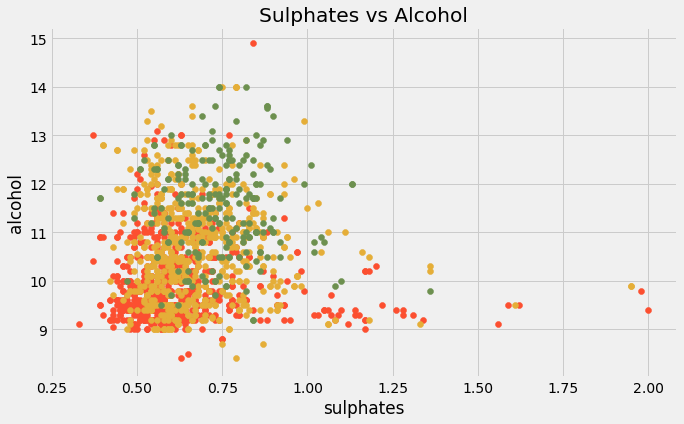

In [121]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_red
colors = ['b','r','g']
label = label_red
plt.title('Red: Sulphates vs Alcohol')
plt.xlabel(red.columns[9])
plt.ylabel(red.columns[10])
for i in range(len(names)):
    bucket = red[red['Target'] == i]
    bucket = bucket.iloc[:,[9,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()

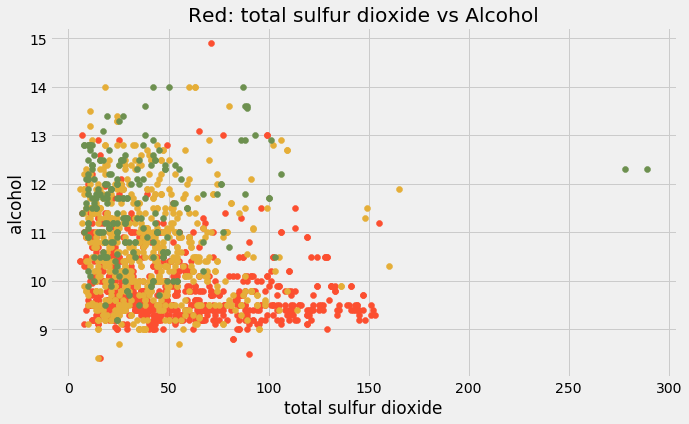

In [131]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_red
colors = ['b','r','g']
label = label_red
plt.title('Red: total sulfur dioxide vs Alcohol')
plt.xlabel(red.columns[6])
plt.ylabel(red.columns[10])
for i in range(len(names)):
    bucket = red[red['Target'] == i]
    bucket = bucket.iloc[:,[6,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()

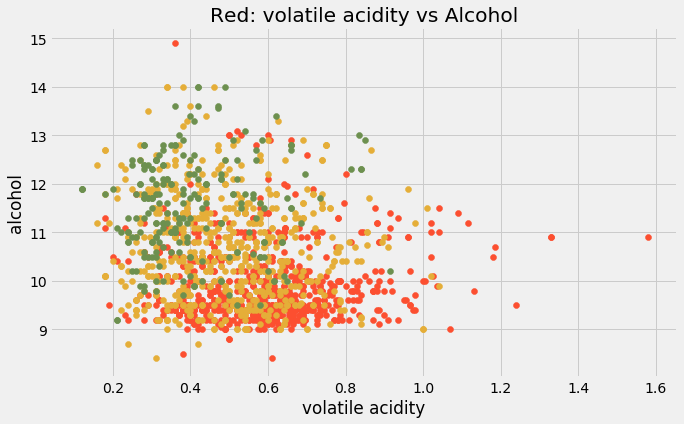

In [128]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_red
colors = ['b','r','g']
label = label_red
plt.title('Red: volatile acidity vs Alcohol')
plt.xlabel(red.columns[1])
plt.ylabel(red.columns[10])
for i in range(len(names)):
    bucket = red[red['Target'] == i]
    bucket = bucket.iloc[:,[1,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()

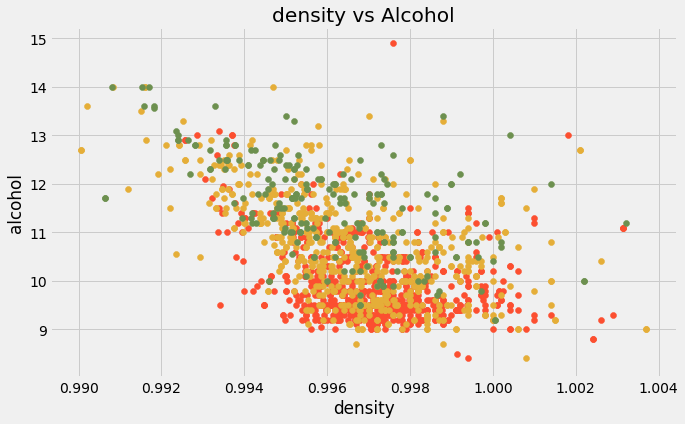

In [127]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_red
colors = ['b','r','g']
label = label_red
plt.title('density vs Alcohol')
plt.xlabel(red.columns[7])
plt.ylabel(red.columns[10])
for i in range(len(names)):
    bucket = red[red['Target'] == i]
    bucket = bucket.iloc[:,[7,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()

In [134]:
#white
white.describe()
white['Target'] = pd.DataFrame(label_white)


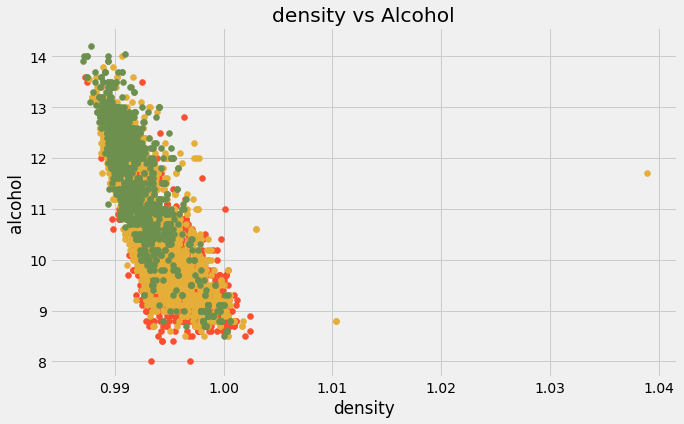

In [135]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_white
colors = ['b','r','g']
label = label_white
plt.title('white: density vs Alcohol')
plt.xlabel(white.columns[7])
plt.ylabel(white.columns[10])
for i in range(len(names)):
    bucket = white[white['Target'] == i]
    bucket = bucket.iloc[:,[7,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()

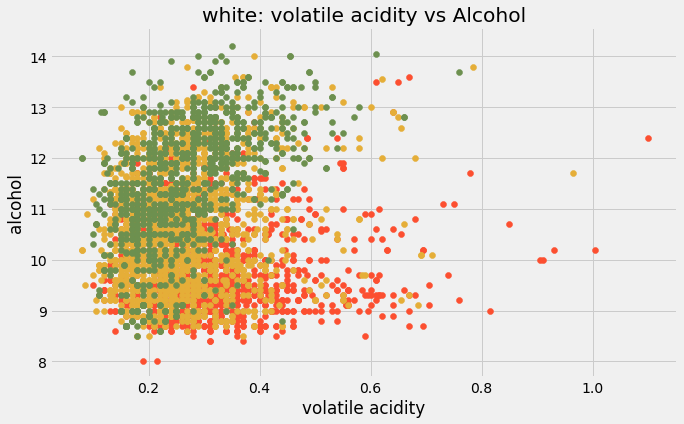

In [136]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_white
colors = ['b','r','g']
label = label_white
plt.title('white: volatile acidity vs Alcohol')
plt.xlabel(white.columns[1])
plt.ylabel(white.columns[10])
for i in range(len(names)):
    bucket = white[white['Target'] == i]
    bucket = bucket.iloc[:,[1,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()

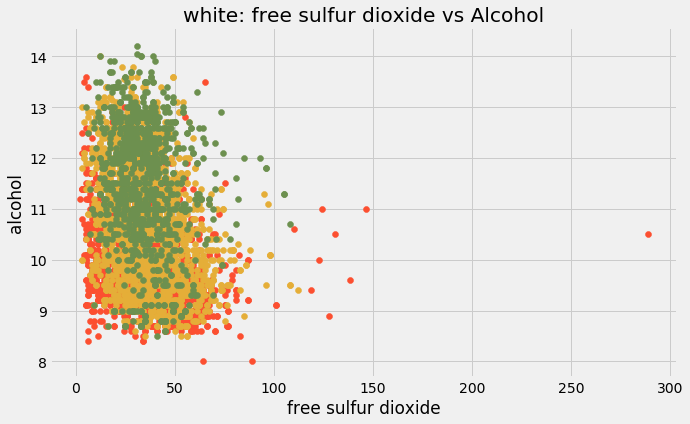

In [137]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_white
colors = ['b','r','g']
label = label_white
plt.title('white: free sulfur dioxide vs Alcohol')
plt.xlabel(white.columns[5])
plt.ylabel(white.columns[10])
for i in range(len(names)):
    bucket = white[white['Target'] == i]
    bucket = bucket.iloc[:,[5,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()

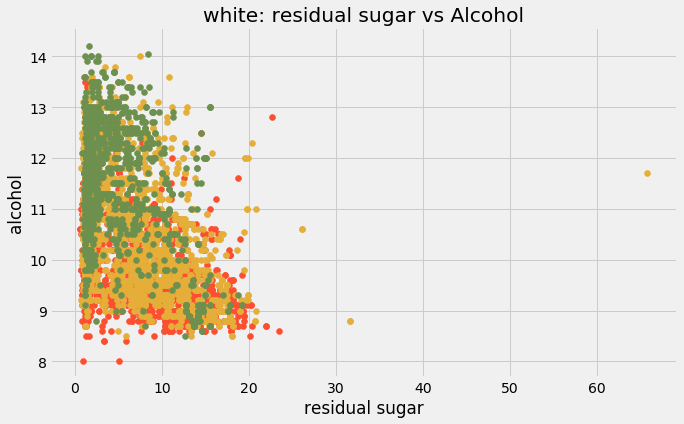

In [138]:
plt.clf()
plt.figure(figsize = (10, 6))
names = label_white
colors = ['b','r','g']
label = label_white
plt.title('white: residual sugar vs Alcohol')
plt.xlabel(white.columns[3])
plt.ylabel(white.columns[10])
for i in range(len(names)):
    bucket = white[white['Target'] == i]
    bucket = bucket.iloc[:,[3,10]].values
    
    plt.scatter(bucket[:, 0], bucket[:, 1]) 
plt.legend()
plt.show()